<a href="https://colab.research.google.com/github/PedroJuiz/SupervisedLearning/blob/main/COVID_19_Prevision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Descomenta la siguiente linea para instalar las dependencias.
!pip install -q xlrd==1.2.0

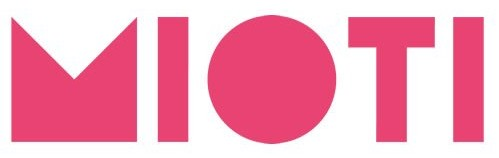

In [ ]:
from IPython.display import Image, HTML
Image(filename='mioti_logo.jpeg', width='200px')

<center>
<p style="font-size: 18px"><b>Machine learning 3</b><br/>Diego García Morate - diegogm@faculty.mioti.es</p>
</center>
<br/>

# Challenge S2: Previsión COVID-19

# Objetivos

El objetivo de este challenge es proporcionar una estimación realista del estado del COVID en España y si es posible estimar su impacto y predecirlo.

## Prerrequisitos

Para hacer funcionar este worksheet deberás tener instalados los paquetes:

* `numpy`
* `pandas`
* `scikit-learn`
* `scipy`

## Configuración del entorno

In [ ]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt, exp, pi

import random

# Dataset

Para analizar este problema vamos a descargarnos un dataset que pone a disposición la unión europea en la siguiente url:

https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

In [ ]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide-2020-04-19.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dateRep                  11768 non-null  datetime64[ns]
 1   day                      11768 non-null  int64         
 2   month                    11768 non-null  int64         
 3   year                     11768 non-null  int64         
 4   cases                    11768 non-null  int64         
 5   deaths                   11768 non-null  int64         
 6   countriesAndTerritories  11768 non-null  object        
 7   geoId                    11732 non-null  object        
 8   countryterritoryCode     11646 non-null  object        
 9   popData2018              11681 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 919.5+ KB


Filtramos el dataset para quedarnos sólo con España:

In [ ]:
df_spain = df[df['geoId'] == 'ES']

In [ ]:
df_spain = df_spain[df_spain['dateRep'] >= '2020-02-20']

In [ ]:
df_spain[df_spain['cases'] > 100].min()

dateRep                    2020-03-07 00:00:00
day                                          1
month                                        3
year                                      2020
cases                                      113
deaths                                       0
countriesAndTerritories                  Spain
geoId                                       ES
countryterritoryCode                       ESP
popData2018                         46723749.0
dtype: object

In [ ]:
df_spain = df_spain.set_index('dateRep').sort_index()

<AxesSubplot:xlabel='dateRep'>

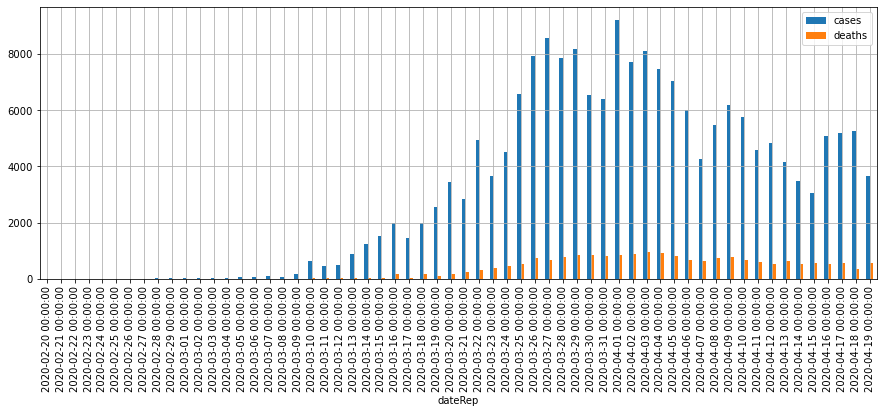

In [ ]:
df_spain[['cases', 'deaths']].plot.bar(figsize=(15,5), grid=True)

En este caso nos vamos a quedar como variables a trabajar el número de días desde el inicio de la pandemia, que llamaremos variable $x$ y la variable $y$ que será el número de casos.

In [ ]:
df_spain

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
dateRep,,,,,,,,,
2020-02-20,20,2,2020,0,0,Spain,ES,ESP,46723749.0
2020-02-21,21,2,2020,0,0,Spain,ES,ESP,46723749.0
2020-02-22,22,2,2020,0,0,Spain,ES,ESP,46723749.0
2020-02-23,23,2,2020,0,0,Spain,ES,ESP,46723749.0
2020-02-24,24,2,2020,0,0,Spain,ES,ESP,46723749.0
2020-02-25,25,2,2020,1,0,Spain,ES,ESP,46723749.0
2020-02-26,26,2,2020,4,0,Spain,ES,ESP,46723749.0
2020-02-27,27,2,2020,5,0,Spain,ES,ESP,46723749.0
2020-02-28,28,2,2020,13,0,Spain,ES,ESP,46723749.0


In [ ]:
puntos_x = list((df_spain.index - df_spain.index.min()).days)

In [ ]:
puntos_x[0:20]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
puntos_y = list(df_spain.cases)

In [ ]:
puntos_y[0:20]

[0, 0, 0, 0, 0, 1, 4, 5, 13, 9, 32, 17, 31, 37, 49, 61, 113, 56, 159, 615]

Un punto que es interesante antes de empezar a modelar los datos es normalizarlos. Para ello normalizaremos la variable objetivo (y) respecto al número máximo

In [ ]:
puntos_y = [punto/max(puntos_y) for punto in puntos_y]

In [ ]:
puntos_y[0:20]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00010843634786380394,
 0.00043374539145521576,
 0.0005421817393190197,
 0.0014096725222294514,
 0.0009759271307742355,
 0.003469963131641726,
 0.0018434179136846672,
 0.0033615267837779224,
 0.004012144870960746,
 0.0053133810453263935,
 0.006614617219692041,
 0.012253307308609846,
 0.006072435480373021,
 0.017241379310344827,
 0.06668835393623943]

# Problema a resolver

El problema que vamos a resolver es intentar modelizar estos datos mediante un algoritmo genético. Una vez que tengamos el modelo podemos utilizarlo para poder analizar el futuro.

Para ello vamos a empezar respondiendo las siguientes preguntas, empezando para la **curva de infectados**:

## ¿Para este problema que podría ser cada uno de los individuos?

Cada uno de los individuos podría ser cada una de los posibles modelos a generar. En este caso vamos a utilizar una función gaussiana:

$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^\frac{-(x-\mu)²}{2*\sigma²} $$

Por ello cada individuo deberá modelizarse con 2 parámetros: $\mu$, $\sigma$. Donde $\mu$ es el valor donde del centro de la curva y $\sigma$ controla la curtosis de la curva (lo estrecha o gruesa que es).

Puedes ver como se comportan los mismos en la siguiente página web: https://academo.org/demos/gaussian-distribution/

In [ ]:
def gauss(x, mu, sigma, multiplier):
    primer = 1 / (sigma * sqrt(2*pi))
    segundo = -((x - mu)*(x - mu)) / (2*sigma*sigma)
    return multiplier * primer * exp(segundo)

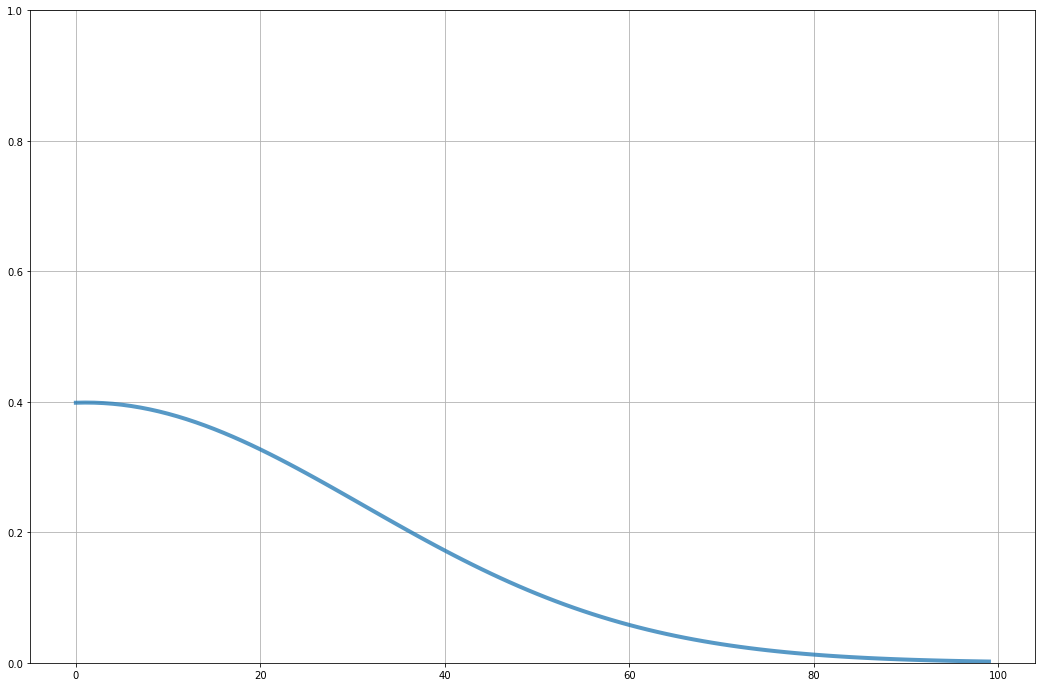

In [ ]:
def draw_gaussian(mu, sigma, multiplier):

    x_values = []
    y_values = []

    for x in range(0, 100):
        y_values.append(gauss(x, mu, sigma, multiplier))

    plt.figure(figsize=(18, 12))
    plt.plot(y_values, alpha=0.75, lw=4)
    plt.grid(True)
    axes = plt.gca()
    axes.set_ylim([0,1])
    plt.show()

# Descomenta si estás utilizando ipywidgets
#from ipywidgets import interactive, IntSlider, FloatSlider
# slider_mu = FloatSlider(min=0, max=50, step=1, value=1, continuous_update=False)
# slider_sigma = FloatSlider(min=1, max=60, step=1, value=30, continuous_update=False)
# slider_multiplier = FloatSlider(min=1, max=60, step=1, value=30, continuous_update=False)
# interactive(draw_gaussian, mu=slider_mu, sigma=slider_sigma, multiplier=slider_multiplier)

draw_gaussian(mu=1.1, sigma=30, multiplier=30)

El error producido al comparar las predicciones del modelo versus los datos reales.

## ¿Y la función de recombinación?

Una función que tome dos modelos y combine ambos parámetros, por ejemplo haciendo la media de los mismos para producir un nuevo modelo.

# Implementación del modelo

In [ ]:
# Implementa aquí tu modelo. Deberás implementar las siguientes funciones y clases.
# Algunas de ellas te valdrán directamente las que vienen en el worksheet y otras tendrás que adaptarlas.

class Individuo(object):
    def __init__(self, mu ,sigma, multiplier):
        self.mu = mu
        self.sigma = sigma
        self.multiplier = multiplier

        self.ajuste = None

    def gauss(self, x):
        primer = 1 / (self.sigma * sqrt(2*pi))
        segundo = -((x - self.mu) * (x - self.mu)) / (2*self.sigma*self.sigma)
        return self.multiplier * primer * exp(segundo)

    def calcular_ajuste(self, puntos_x, puntos_y):
        error_acc = 0.0
        for i in range(len(puntos_x)):
            dest_y = self.gauss(puntos_x[i])

            error = dest_y - puntos_y[i]
            error = error * error

            if error > 0.01:
                error = sqrt(error)

            error_acc += error

        self.ajuste = error_acc

    def __repr__(self):
        return f"Individuo({self.mu, self.sigma, self.multiplier})"


def inicializar_pool(size=20):
    pool = []
    for i in range(size):
        mu = random.uniform(0, 60.0)
        sigma = random.uniform(0.25, 0.80)
        multiplier = random.uniform(0, 60)

        pool.append(Individuo(mu, sigma, multiplier))

    return pool


def calcular_ajuste(pool, puntos_x, puntos_y):

    for individuo in pool:
        individuo.calcular_ajuste(puntos_x, puntos_y)

    return pool


def mejor_individuo(pool, puntos_x, puntos_y):
    return sorted(pool, key=lambda obj: obj.ajuste)[0]


def elegir_mejores_individuos(pool, num_individuos=10):
    return sorted(pool, key=lambda obj: obj.ajuste)[:num_individuos]


def cross_over(x, y):
    mu_combinada = 0.5 * (x.mu + y.mu)
    sigma_combinada = 0.5 * (x.sigma + y.sigma)
    multiplier_combinada = 0.5 * (x.multiplier + y.multiplier)
    return Individuo(mu_combinada, sigma_combinada, multiplier_combinada)


def cross_over_pool(pool, pool_size_dest=10):
    size_pool = len(pool)
    new_pool = []

    for i in range(pool_size_dest):
        a = random.randint(0, size_pool - 1)
        b = random.randint(0, size_pool - 1)

        new_pool.append(cross_over(pool[a], pool[b]))

    return new_pool


def mutar(individuo, coef_mutacion=0.5):
    individuo.mu = individuo.mu + random.uniform(-coef_mutacion, coef_mutacion)
    individuo.sigma = individuo.sigma + random.uniform(-coef_mutacion, coef_mutacion)
    individuo.multiplier = individuo.multiplier + random.uniform(-coef_mutacion, coef_mutacion)
    individuo.ajuste = None
    return individuo


def mutar_pool(pool, coef_mutacion=0.5):
    new_pool = []

    for individuo in pool:
        new_pool.append(mutar(individuo, coef_mutacion))

    return new_pool

In [ ]:
pool = inicializar_pool(10)
pool = calcular_ajuste(pool, puntos_x, puntos_y)
max_iteraciones = 1000
iteraciones = 0
generaciones = 10000

for i in range(generaciones):
    pool = elegir_mejores_individuos(pool, 1)
    pool = cross_over_pool(pool, 100)
    pool = mutar_pool(pool)
    pool = calcular_ajuste(pool, puntos_x, puntos_y)

    iteraciones += 1
    if iteraciones % 100 == 0:
        print(f'{iteraciones:03d} - {mejor_individuo(pool, puntos_x, puntos_y)} - Ajuste: {mejor.ajuste}')

    if iteraciones == max_iteraciones:
        break

mejor = mejor_individuo(pool, puntos_x, puntos_y)

100 - Individuo((42.36147689599699, 10.581087663355296, 21.111938233742997)) - Ajuste: 2.4270881299463154
200 - Individuo((42.61936252259848, 10.87324812638617, 21.35144357415304)) - Ajuste: 2.4270881299463154
300 - Individuo((42.42103141237466, 10.78190117946107, 21.274607479273424)) - Ajuste: 2.4270881299463154
400 - Individuo((42.485841131396135, 10.842129641434537, 21.4637319477885)) - Ajuste: 2.4270881299463154
500 - Individuo((42.447672498716834, 10.616517434306038, 21.146830325621632)) - Ajuste: 2.4270881299463154
600 - Individuo((42.41510772600419, 10.7086795444024, 21.14335396970968)) - Ajuste: 2.4270881299463154
700 - Individuo((42.58959532296756, 10.839219771322378, 21.312392087953988)) - Ajuste: 2.4270881299463154
800 - Individuo((42.67163358370569, 10.884825651536417, 21.25420348665066)) - Ajuste: 2.4270881299463154
900 - Individuo((42.586579659024835, 10.856722064883266, 21.212472640672615)) - Ajuste: 2.4270881299463154
1000 - Individuo((42.49754187341871, 10.892637623811

In [ ]:
mejor

Individuo((42.49754187341871, 10.892637623811666, 21.440553324094747))

In [ ]:
modelo_y = []

for i in puntos_x:
    modelo_y.append(mejor.gauss(i))

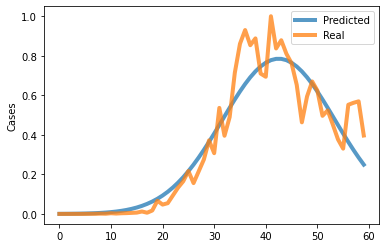

In [ ]:
plt.plot(modelo_y, label = 'Predicted', alpha = 0.75, lw = 4)
plt.plot(puntos_y, label = 'Real', alpha = 0.75, lw = 4)
plt.ylabel('Cases')
plt.legend()
plt.show()

## Conclusiones

* ¿Qué te parece la calidad del modelo? ¿Qué se te ocurre que podríamos hacer para mejorar?

Basándome en el ajuste, podría decirse que la calidad del modelo es aceptable, dado que el valor de ajuste es relativamente bajo.

Para mejorar el modelo podrían ajustarse los parámetros del algoritmo genético, con el fin de experimentar con diferentes valores para ver si se puede obtener una mejor combinación que produzca resultados más precisos, o cambiar la función de ajuste como el MAE (Error absoluto medio) o el R^2 (Coeficiente de determinación), entre otros.

# Anexo I. Modelos SIR

Al margen de lo que hemos aprendido en el challenge actual, existen modelos específicos epidemiológicos. Uno de los más conocidos y utilizados es el modelo SIR en el que modeliza la población en base a 3 conjuntos:

* **S**: Susceptibles. Población que no dispone de inmunidad y está en posibilidad de infectarse.
* **I**: Infectados. Población actualmente infectada y por tanto es capaz de transmitir la enfermedad.
* **R**: Recuperados. Población que ha pasado la enfermedad y posee inmunidad.

$$ \frac{dS}{dt} = -\beta S I$$
$$ \frac{dI}{dt} = +\beta S I - \gamma I$$
$$ \frac{dR}{dt} = -\gamma I$$

La relación entre estos grupos se basa en diversos parámetros:

* $\beta$: Es la tasa de transmisión.
* $\gamma$: Es la tasa de recuperación.

Vamos a ver como podríamos implementar este modelo de forma sencilla con Python. Para ello vamos a implementar una función que para un dia concreto aplique el modelo anterior. Descompondremos los factores $\beta$ y $\gamma$ en subfactores para hacer el análisis más completo:

In [ ]:
def simulate_day(susceptible, infected, deaths, recovered,
                 transmision_rate=0.15, # Probability of close encounter get infected
                 disease_duration=14, # Duration of the disease in days
                 mortality_rate=0.05, # Mortality rate
                 interaction_rate=2.5, # Average number of close encounters per day per person
                 verbose=False):

    pop_ini = susceptible + infected + deaths + recovered

    if verbose:
        print(f"Initial population: {pop_ini}")

    new_infected = (interaction_rate * transmision_rate) * infected * susceptible / (susceptible + infected + recovered)
    new_deaths = infected * mortality_rate / disease_duration
    new_recovered = infected * (1 - mortality_rate) / disease_duration

    susceptible = susceptible - new_infected
    infected = infected + new_infected - new_recovered - new_deaths
    deaths = deaths + new_deaths
    recovered = recovered + new_recovered

    pop_end = susceptible + infected + deaths + recovered

    if verbose:
        print(f"Susceptible: {susceptible}")
        print(f"infected: {infected}")
        print(f"deaths: {deaths}")
        print(f"recovered: {recovered}")
        print(f"End pop: {pop_end}")

    assert (pop_ini - pop_end) < 0.00001

    return susceptible, infected, deaths, recovered

Una vez que tenemos la función anterior implementada podemos utilizarla para simular una epidemia de la siguiente forma:

In [ ]:
susceptible = 47000
infected = 1
deaths = 0
recovered = 0

list_susceptible = []
list_infected = []
list_deaths = []
list_recovered = []


for day in range(100):
    susceptible, infected, deaths, recovered = simulate_day(susceptible, infected, deaths, recovered)
    list_susceptible.append(susceptible)
    list_infected.append(infected)
    list_deaths.append(deaths)
    list_recovered.append(recovered)

Por último vamos a dibujar los resultados obtenidos:

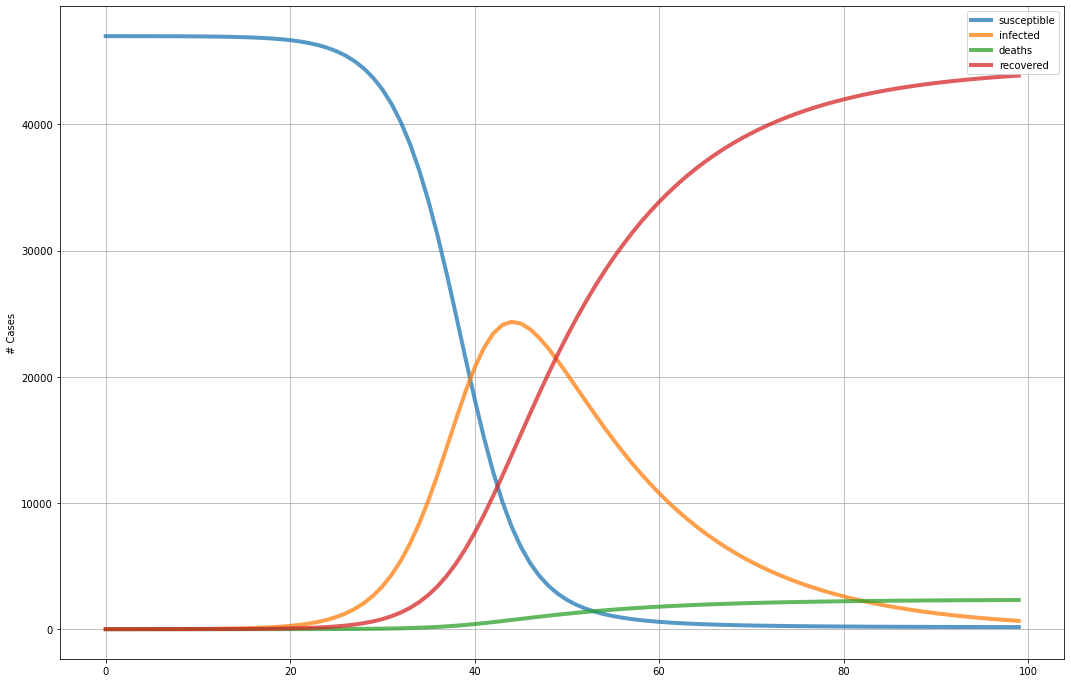

In [ ]:
plt.figure(figsize=(18, 12))
plt.plot(list_susceptible, label="susceptible", alpha=0.75, lw=4)
plt.plot(list_infected, label="infected", alpha=0.75, lw=4)
plt.plot(list_deaths, label="deaths", alpha=0.75, lw=4)
plt.plot(list_recovered, label="recovered", alpha=0.75, lw=4)
plt.ylabel('# Cases')
plt.legend()
plt.grid(True)
plt.show()

## Conclusiones

¿Qué te parece este modelo? ¿qué ventajas tiene esta aproximación versus la anterior? ¿podrían combinarse ambos enfoques para producir un modelo más robusto?

Este modelo resulta más simple pero más fácil de entender y de interpretar, ya que se basa en ecuaciones matemáticas simples, los parametros del modelo se pueden ajustar en función de la enfermedad con la que estemos trabajando y mayores, estos modelos tienen un coste computacional más bajo que los algoritmos genéticos.

Por otra parte, si podrían combinarse ambos modelos, utilizando el modelo SIR como base y mejorar el ajuste a los datos con algoritmos genéticos. De esta manera, se puede aprovechar la simplicidad y la buena interpretación de los modelos SIR junto con la capacidad de optimización de parametros de los algoritmos genéticos.